In [ ]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
#from pdpbox import pdp, 

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 42

In [ ]:
#Loading training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/test.csv')

In [ ]:
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
scaler = StandardScaler()

In [ ]:
tr = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tr,y, random_state = 1)

In [ ]:
import lightgbm as lgb

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)

In [ ]:
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [ ]:
gbm = lgb.train(param,  lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.580427
[2]	valid_0's auc: 0.629521
[3]	valid_0's auc: 0.663015
[4]	valid_0's auc: 0.674821
[5]	valid_0's auc: 0.690618
[6]	valid_0's auc: 0.709638
[7]	valid_0's auc: 0.715527
[8]	valid_0's auc: 0.717254
[9]	valid_0's auc: 0.725773
[10]	valid_0's auc: 0.737384
[11]	valid_0's auc: 0.738048
[12]	valid_0's auc: 0.74969
[13]	valid_0's auc: 0.759547
[14]	valid_0's auc: 0.764796
[15]	valid_0's auc: 0.768353
[16]	valid_0's auc: 0.767517
[17]	valid_0's auc: 0.767312
[18]	valid_0's auc: 0.775866
[19]	valid_0's auc: 0.778056
[20]	valid_0's auc: 0.78023
[21]	valid_0's auc: 0.782777
[22]	valid_0's auc: 0.782585
[23]	valid_0's auc: 0.782226
[24]	valid_0's auc: 0.786745
[25]	valid_0's auc: 0.788045
[26]	valid_0's auc: 0.7928
[27]	valid_0's auc: 0.794891
[28]	valid_0's auc: 0.799557
[29]	valid_0's auc: 0.799719
[30]	valid_0's auc: 0.801135
[31]	valid_0's auc: 0.802871
[32]	valid_0's auc: 0.801502
[33]	valid_0's auc: 0.803733
[34]	valid_0's auc: 0.806969
[35]	valid_0's auc: 0.8074


In [ ]:
lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    max_depth = 2000,
    n_estimators = 5000,
    objective = 'binary',
    class_weight = {0:0.1, 1:0.9},
    n_jobs = -1
)

In [ ]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.1, 1: 0.9},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=2000, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
train_predict = lgbm_model.predict(X_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

1.0

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    134845
           1       1.00      1.00      1.00     15155

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000



In [ ]:
val_predict = lgbm_model.predict(X_test)

In [ ]:
val_score = roc_auc_score(y_test,val_predict)

In [ ]:
val_score

0.6644625778507338

In [ ]:
print(classification_report(y_test, val_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     45057
           1       0.71      0.34      0.46      4943

    accuracy                           0.92     50000
   macro avg       0.82      0.66      0.71     50000
weighted avg       0.91      0.92      0.91     50000



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test,val_predict)

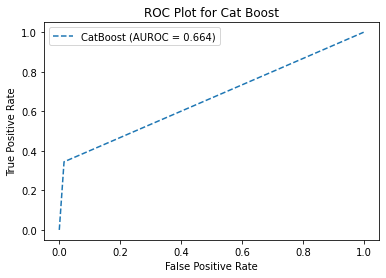

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
X_under, y_under = undersample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_under,y_under, random_state = 1)

In [ ]:
lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    max_depth = 200,
    n_estimators = 500,
    objective = 'binary',
    class_weight = 'balanced',
    n_jobs = -1
)

In [ ]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=200, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
train_predict = lgbm_model.predict(X_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.9957945062970275

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15045
           1       1.00      0.99      1.00     15102

    accuracy                           1.00     30147
   macro avg       1.00      1.00      1.00     30147
weighted avg       1.00      1.00      1.00     30147



In [ ]:
val_predict = lgbm_model.predict(X_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.7937623203649007

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      5053
           1       0.79      0.80      0.79      4996

    accuracy                           0.79     10049
   macro avg       0.79      0.79      0.79     10049
weighted avg       0.79      0.79      0.79     10049



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,val_predict)

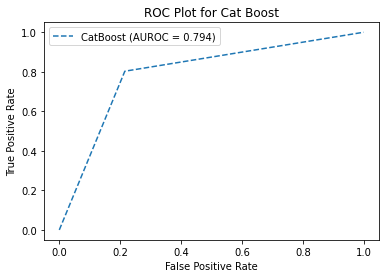

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_sm,y_sm, random_state = 1)

In [ ]:
lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    max_depth = 200,
    n_estimators = 500,
    objective = 'binary',
    class_weight = 'balanced',
    n_jobs = -1
)

In [ ]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=200, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
train_predict = lgbm_model.predict(X_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.9455950911410109

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95    134970
           1       0.96      0.93      0.94    134883

    accuracy                           0.95    269853
   macro avg       0.95      0.95      0.95    269853
weighted avg       0.95      0.95      0.95    269853



In [ ]:
val_predict = lgbm_model.predict(X_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.9148808087453275

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     44932
           1       0.93      0.90      0.91     45019

    accuracy                           0.91     89951
   macro avg       0.92      0.91      0.91     89951
weighted avg       0.92      0.91      0.91     89951



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val, lgbm_model.predict_proba(X_val)[:,1])

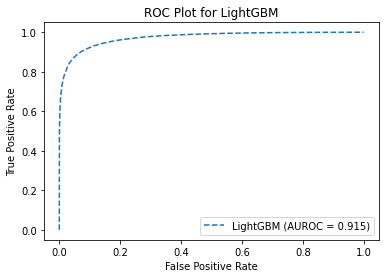

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'LightGBM (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#Confusion matrices of Trainng and Validation data
x = metrics.confusion_matrix(y_val, val_predict)
y = metrics.confusion_matrix(y_train, train_predict)

Text(91.68, 0.5, 'predicted label')

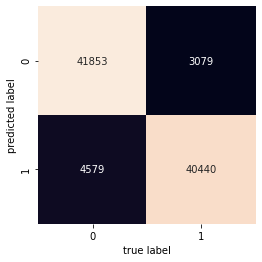

In [ ]:
sns.heatmap(x,square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

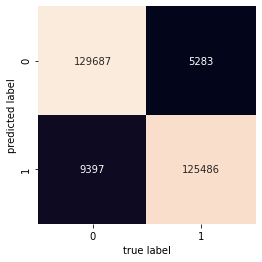

In [ ]:
sns.heatmap(y,square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(lgbm_model, 'lgb.pkl')

In [ ]:
lgbm_model.save_model('mode.pkl')

In [ ]:
import pickle

In [ ]:
pickle.dump(lgbm_model, open('lgbm_model.pkl', 'wb'))

In [ ]:
X_train.shape

In [ ]:
X_train[1].dtype